# Partial Solution: LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import AUC
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
# This code imports the data you generated before for replicating.

stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')

diff_T = stock_prices['T'].diff().dropna()

split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

In [3]:
# This code is imported from the previous milestone for replicating.

n_steps = 10
n_features = 1

In [4]:
# This code is imported from the previous milestone for replicating.

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
# This code is imported from the previous milestone for replicating.

X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))

In [6]:
def LSTM_part():
    model = Sequential()
    model.add(LSTM(256,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['mse'])
    return model

In [7]:
LSTM_model = LSTM_part()
history_LSTM = LSTM_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 4s 830ms/step - loss: 0.3989 - mse: 0.3989 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 2/200
2/2 [==============================] - 0s 124ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 3/200
2/2 [==============================] - 0s 86ms/step - loss: 0.3749 - mse: 0.3749 - val_loss: 0.0978 - val_mse: 0.0978
Epoch 4/200
2/2 [==============================] - 0s 115ms/step - loss: 0.3649 - mse: 0.3649 - val_loss: 0.0982 - val_mse: 0.0982
Epoch 5/200
2/2 [==============================] - 0s 113ms/step - loss: 0.3568 - mse: 0.3568 - val_loss: 0.0987 - val_mse: 0.0987
Epoch 6/200
2/2 [==============================] - 0s 101ms/step - loss: 0.3467 - mse: 0.3467 - val_loss: 0.0997 - val_mse: 0.0997
Epoch 7/200
2/2 [==============================] - 0s 96ms/step - loss: 0.3392 - mse: 0.3392 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 8/200
2/2 [==============================] - 0s 102ms/step - loss: 0.3296 - mse

Epoch 63/200
2/2 [==============================] - 0s 84ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 9.4179e-04 - val_mse: 9.4179e-04
Epoch 64/200
2/2 [==============================] - 0s 85ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.4250e-04 - val_mse: 7.4250e-04
Epoch 65/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 3.6693e-04 - val_mse: 3.6693e-04
Epoch 66/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 3.2320e-04 - val_mse: 3.2320e-04
Epoch 67/200
2/2 [==============================] - 0s 85ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 6.1633e-04 - val_mse: 6.1633e-04
Epoch 68/200
2/2 [==============================] - 0s 89ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 2.6637e-04 - val_mse: 2.6637e-04
Epoch 69/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 2.4140e-04 - val_mse: 2.4140e-04
Epoch 70/200
2/2 [=========

Epoch 122/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 2.9884e-04 - val_mse: 2.9884e-04
Epoch 123/200
2/2 [==============================] - 0s 89ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 1.2467e-04 - val_mse: 1.2467e-04
Epoch 124/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.8512e-04 - val_mse: 1.8512e-04
Epoch 125/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 1.7760e-04 - val_mse: 1.7760e-04
Epoch 126/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 6.5482e-05 - val_mse: 6.5482e-05
Epoch 127/200
2/2 [==============================] - 0s 86ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.4499e-04 - val_mse: 1.4499e-04
Epoch 128/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 1.3928e-04 - val_mse: 1.3928e-04
Epoch 129/200
2/2 [=

2/2 [==============================] - 0s 58ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 9.0582e-05 - val_mse: 9.0582e-05
Epoch 181/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 7.3345e-05 - val_mse: 7.3345e-05
Epoch 182/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.3802e-04 - val_mse: 1.3802e-04
Epoch 183/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 2.0838e-04 - val_mse: 2.0838e-04
Epoch 184/200
2/2 [==============================] - 0s 55ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 1.8228e-04 - val_mse: 1.8228e-04
Epoch 185/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 1.1309e-04 - val_mse: 1.1309e-04
Epoch 186/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.2022e-05 - val_mse: 9.2022e-05
Epoch 187/200
2/2 [===============

In [8]:
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [9]:
predictions_LSTM_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat_lstm = LSTM_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat_lstm)
    T_input = T_input[1:]
    predictions_LSTM_T.append(yhat_lstm)

In [11]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [12]:
print('RMSE of AT&T for LSTM model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_LSTM_T).flatten())))

RMSE of AT&T for LSTM model 0.4380


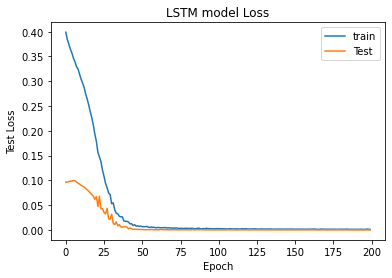

In [13]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('LSTM model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

Even though the structure of LSTM is different than that of RNN, it shows a very similar performance, indicating that we do not need very complex structure to model this data.